# <center> Distribución Empírica para Datos Discretos </center>
Podemos usar `rv_discrete` de `scipy.stats`  para construir una variable aleatoria discreta arbitraria definida en un conjunto finito de valores xk con Prob{X=xk} = pk utilizando como argumento la palabra clave `values` ​​para el constructor `rv_discrete`.

**Pasos:**

1. Importar las librerías necesarias:


In [1]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

2. Generar o cargar el conjunto de datos:

In [45]:
df = pd.read_excel('discretos.xlsx')
datos = df['Valor']
print(datos.head(10))

0    5
1    1
2    4
3    0
4    2
5    5
6    3
7    1
8    4
9    7
Name: Valor, dtype: int64


3. Calcular las frecuencias de los datos individuales:

In [19]:
# Obtener la distribución de frecuencias
valores, conteos = np.unique(datos, return_counts=True)

# Calcular las probabilidades empíricas de cada valor
probabilidades = conteos / len(datos)
acumulada=np.cumsum(probabilidades)

# Visualizar la distribución de frecuencias
dist_frec = pd.DataFrame({'Valor': valores, 'Frecuencia': conteos, 'Probabilidad': probabilidades, 'Acumulada': acumulada})
print(dist_frec.to_string(index=False))

 Valor  Frecuencia  Probabilidad  Acumulada
     0           4      0.057143   0.057143
     1          13      0.185714   0.242857
     2          18      0.257143   0.500000
     3           9      0.128571   0.628571
     4          12      0.171429   0.800000
     5           7      0.100000   0.900000
     6           3      0.042857   0.942857
     7           4      0.057143   1.000000


4. Crear la distribución empírica discreta:

In [6]:
custom_discrete = rv_discrete(name='custom_discrete', values=(valores, probabilidades))

5. Visualización de la distribución:

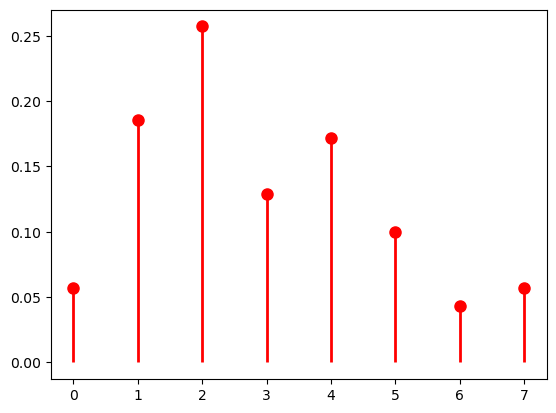

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(valores, custom_discrete.pmf(valores), 'ro', ms=8, mec='r')
ax.vlines(valores, 0, custom_discrete.pmf(valores), colors='r', lw=2)
plt.show()

6. Generar muestras a partir de la distribución discreta:

In [35]:
print(custom_discrete.rvs(size=10))

[3 2 5 3 2 2 1 2 3 1]


7. Otros métodos para generar datos de la distribución empírica:

In [47]:
import random  
muestras = random.choices(valores, probabilidades, k=10)
# print(muestras)
print([int(x) for x in muestras])


[2, 2, 4, 1, 2, 2, 2, 7, 4, 2]


In [49]:
from IPython.display import display, Math
print(custom_discrete.mean())
print(custom_discrete.moment(1))
custom_discrete.expect()
custom_discrete.stats(moments='v')
custom_discrete.interval(0.50)
custom_discrete.support()
print(custom_discrete.pmf(5))
prob1=custom_discrete.cdf(6)-custom_discrete.cdf(1)
display(Math(fr'P(2 \leq X \leq 6) = {prob1:.4f}'))




2.9285714285714284
2.9285714285714284
0.1


<IPython.core.display.Math object>

In [50]:
print(np.random.binomial(10,0.5,1))

[3]
